In [1]:
import pandas as pd

df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
value_counts = df['Exited'].value_counts()

value_counts

Exited
0    7963
1    2037
Name: count, dtype: int64

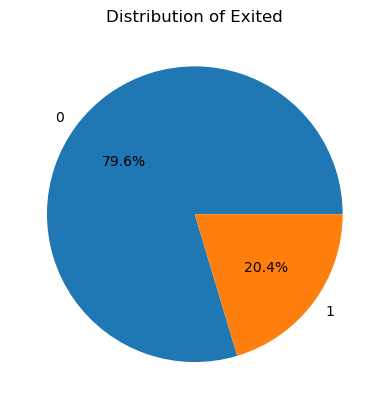

In [3]:
import matplotlib.pyplot as plt

labels = value_counts.index

counts = value_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title('Distribution of Exited')

plt.show()

In [4]:
# pip install --upgrade scikit-learn imbalanced-learn imblearn

In [5]:
from imblearn.over_sampling import RandomOverSampler

input_columns = df.drop('Exited', axis=1)  

class_column = df['Exited']

oversampler = RandomOverSampler(random_state=0)

input_columns_resampled, class_column_resampled = oversampler.fit_resample(input_columns, class_column)


df_balanced = pd.concat([input_columns_resampled, class_column_resampled], axis=1)

class_distribution = df_balanced['Exited'].value_counts()
print(class_distribution)

Exited
1    7963
0    7963
Name: count, dtype: int64


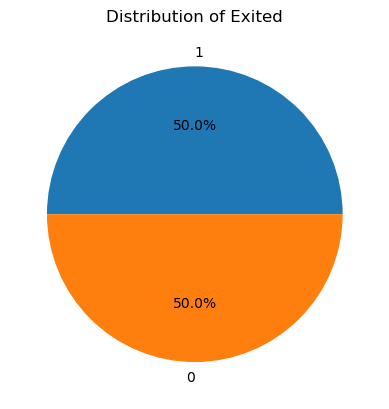

In [6]:
value_counts = df_balanced['Exited'].value_counts()

labels = value_counts.index

counts = value_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title('Distribution of Exited')

plt.show()

In [7]:
X = df_balanced.iloc[:, 3:13].values
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [565 'Germany' 'Male' ... 1 0 175070.94]
 [553 'Spain' 'Female' ... 0 1 30730.95]
 [492 'France' 'Female' ... 1 1 182865.09]]


In [8]:
y = df_balanced.iloc[:, 13].values
print(y)

[1 0 1 ... 1 1 1]


In [9]:
print(X[:, 2])

['Female' 'Female' 'Female' ... 'Male' 'Female' 'Female']


In [10]:
from sklearn.preprocessing import LabelEncoder

labelencoder_gender = LabelEncoder()
X[:, 2] = labelencoder_gender.fit_transform(X[:, 2])

In [11]:
print(X[:, 2])

[0 0 0 ... 1 0 0]


In [12]:
labelencoder_gender.transform(["Male","Female"])

array([1, 0])

In [13]:
import numpy as np

distinct_values = np.unique(X[:, 1])
print(distinct_values)

['France' 'Germany' 'Spain']


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')


X = ct.fit_transform(X)

In [15]:
print(X[0])

[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [18]:
print(X_train)

[[-0.93041226 -0.6660016   1.83627033 ... -1.55261795 -0.92478892
  -0.87888847]
 [ 1.07479237 -0.6660016  -0.54458213 ...  0.64407345 -0.92478892
  -1.26171023]
 [-0.93041226 -0.6660016   1.83627033 ...  0.64407345  1.08132784
   1.70394276]
 ...
 [-0.93041226 -0.6660016   1.83627033 ...  0.64407345  1.08132784
   0.83065375]
 [-0.93041226  1.50149789 -0.54458213 ...  0.64407345 -0.92478892
  -1.2493363 ]
 [-0.93041226  1.50149789 -0.54458213 ...  0.64407345 -0.92478892
   0.31223535]]


In [19]:
import numpy as np
import tensorflow as tf

np.random.seed(42)

tf.random.set_seed(42)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [21]:
input_dim = len(X_train[0])

model.add(Dense(6, activation = 'relu', input_dim = input_dim))

model.add(Dense(6, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

In [22]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 78        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 127 (508.00 Byte)
Trainable params: 127 (508.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
1195/1195 [==============================] - 2s 894us/step - loss: 0.6035 - accuracy: 0.6695
Epoch 2/10
1195/1195 [==============================] - 1s 903us/step - loss: 0.5146 - accuracy: 0.7401
Epoch 3/10
1195/1195 [==============================] - 1s 897us/step - loss: 0.4840 - accuracy: 0.7642
Epoch 4/10
1195/1195 [==============================] - 1s 892us/step - loss: 0.4730 - accuracy: 0.7720
Epoch 5/10
1195/1195 [==============================] - 1s 893us/step - loss: 0.4669 - accuracy: 0.7776
Epoch 6/10
1195/1195 [==============================] - 1s 917us/step - loss: 0.4634 - accuracy: 0.7754
Epoch 7/10
1195/1195 [==============================] - 1s 912us/step - loss: 0.4599 - accuracy: 0.7774
Epoch 8/10
1195/1195 [==============================] - 1s 894us/step - loss: 0.4579 - accuracy: 0.7809
Epoch 9/10
1195/1195 [==============================] - 1s 891us/step - loss: 0.4562 - accuracy: 0.7806
Epoch 10/10
1195/1195 [==============================] - 1s 935u

In [25]:
evaluation = model.evaluate(X_test, y_test)

print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

125/125 [==============================] - 0s 790us/step - loss: 0.4711 - accuracy: 0.7727
Loss: 0.4711152911186218
Accuracy: 0.7727272510528564


In [26]:
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5)
y_pred_binary

125/125 [==============================] - 0s 717us/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

Accuracy: 0.7727272727272727
Precision: 0.7795918367346939
Recall: 0.7636181909045477
F1 Score: 0.7715223428427164


In [28]:
model = Sequential()

input_dim = len(X_train[0])

model.add(Dense(128, activation = 'relu', input_dim = input_dim))

model.add(Dense(64, activation = 'relu'))

model.add(Dense(32, activation = 'relu'))

model.add(Dense(16, activation = 'relu'))

model.add(Dense(8, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy' ])

model.fit(X_train, y_train, batch_size = 10, epochs = 20)

Epoch 1/20
1195/1195 [==============================] - 2s 1ms/step - loss: 0.5023 - accuracy: 0.7473
Epoch 2/20
1195/1195 [==============================] - 1s 1ms/step - loss: 0.4493 - accuracy: 0.7845
Epoch 3/20
1195/1195 [==============================] - 1s 1ms/step - loss: 0.4361 - accuracy: 0.7943
Epoch 4/20
1195/1195 [==============================] - 1s 1ms/step - loss: 0.4236 - accuracy: 0.8017
Epoch 5/20
1195/1195 [==============================] - 1s 1ms/step - loss: 0.4116 - accuracy: 0.8077
Epoch 6/20
1195/1195 [==============================] - 1s 1ms/step - loss: 0.3990 - accuracy: 0.8154
Epoch 7/20
1195/1195 [==============================] - 1s 1ms/step - loss: 0.3865 - accuracy: 0.8241
Epoch 8/20
1195/1195 [==============================] - 1s 1ms/step - loss: 0.3739 - accuracy: 0.8279
Epoch 9/20
1195/1195 [==============================] - 1s 1ms/step - loss: 0.3601 - accuracy: 0.8387
Epoch 10/20
1195/1195 [==============================] - 1s 1ms/step - loss: 0.345

In [29]:
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

125/125 [==============================] - 0s 766us/step
Accuracy: 0.8583626318432949
Precision: 0.8303448275862069
Recall: 0.9025487256371814
F1 Score: 0.8649425287356322


In [31]:
model.save("churn_model.keras")

In [33]:
from joblib import dump

dump(labelencoder_gender, "churn_label_encoder.pkl")

['churn_label_encoder.pkl']

In [34]:
from joblib import dump

dump(ct, "churn_column_transformer.pkl")

['churn_column_transformer.pkl']

In [35]:
from joblib import dump

dump(sc, "churn_standard_scaler.pkl")

['churn_standard_scaler.pkl']

In [36]:
new_customer = np.array( [[600,"France","Male",40, 3, 60000, 2, 1, 1, 50000]])

In [37]:
from joblib import load

labelencoder_gender_loaded=load("churn_label_encoder.pkl")

new_customer[:, 2] = labelencoder_gender_loaded.transform(new_customer[:, 2])

In [38]:
from joblib import load

ct_loaded = load("churn_column_transformer.pkl")

new_customer = ct.transform(new_customer)

In [39]:
from joblib import load

sc_loaded = load("churn_standard_scaler.pkl")

new_customer = sc_loaded.transform(new_customer)
print(new_customer)

[[ 1.07479237 -0.6660016  -0.54458213 -0.49084051  0.98454672 -0.10120986
  -0.67592971 -0.35207194  0.73346722  0.64407345  1.08132784 -0.88180893]]


In [42]:
from keras.models import load_model

loaded_model = load_model("churn_model.keras")

In [43]:
new_prediction_proba = loaded_model.predict(new_customer)

new_prediction = (new_prediction_proba > 0.5)

print(new_prediction)

1/1 [==============================] - 0s 55ms/step
[[False]]
